<a href="https://colab.research.google.com/github/ParkSlingshot/-/blob/main/TensorflowRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Linear Function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
Tortoise_Speed = 1 #@param {type : "slider", min:0, max:10, step:0}
Tortoise_Bias = 4#@param {type : "slider", min:0, max:10, step:0}
Hare_Speed = 2#@param {type : "slider", min:0, max:10, step:0}

h_xdata, h_ydata, t_xdata, t_ydata = [],[],[],[]
list = np.linspace(0,10,101)
doMeet = False



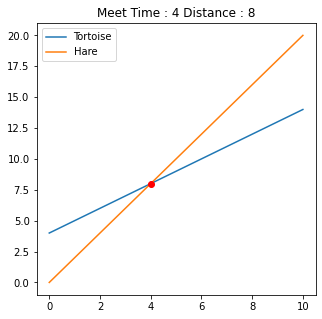

In [ ]:
plt.figure(figsize=(5,5))

for t in list:
  t_y = Tortoise_Speed * t + Tortoise_Bias
  h_y = Hare_Speed * t
  t_xdata.append(t)
  t_ydata.append(t_y)
  h_xdata.append(t)
  h_ydata.append(h_y)
  if (h_y >= t_y and (not doMeet)) :
    doMeet = True
    meetTime = t
    meetDistance = t_y

plt.plot(t_xdata, t_ydata, label='Tortoise')
plt.plot(h_xdata, h_ydata, label='Hare')

if (doMeet):
  plt.title("Meet Time : " + str(math.ceil(meetTime)) + " Distance : " + str(math.ceil(meetDistance)))
  plt.plot(meetTime, meetDistance, 'ro')
else:
  plt.title("만나지 못했습니다.")

plt.legend()
plt.show()

#2. Tensorflow

In [ ]:
import tensorflow as tf
learning_rate = 0.01 #미분계수
iteration = 200 #반복횟수


model = tf.keras.models.Sequential() #n층의 신경망 구성시 사용 함수
model.add(tf.keras.layers.Dense(1, input_dim = 1))

#Stochastic Gradient Descent Optimizer 
sgd = tf.keras.optimizers.SGD(learning_rate = learning_rate)
#Mean Square Error loss function
mse = tf.keras.losses.mean_squared_error

model.compile(loss = mse, optimizer = sgd)
model.summary()

#Model Training
t_history = model.fit(t_xdata, t_ydata, epochs = iteration)

In [ ]:
h_history = model.fit(h_xdata, h_ydata, epochs= iteration)


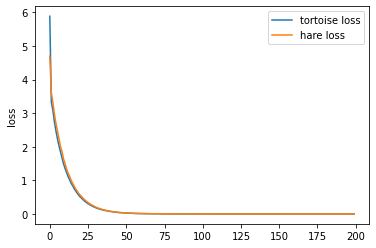

In [ ]:
#iteration = 50, result
plt.plot(t_history.history['loss'],label='tortoise loss')
plt.plot(h_history.history['loss'],label='hare loss')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
result = model.predict([10])
result

array([[19.999893]], dtype=float32)

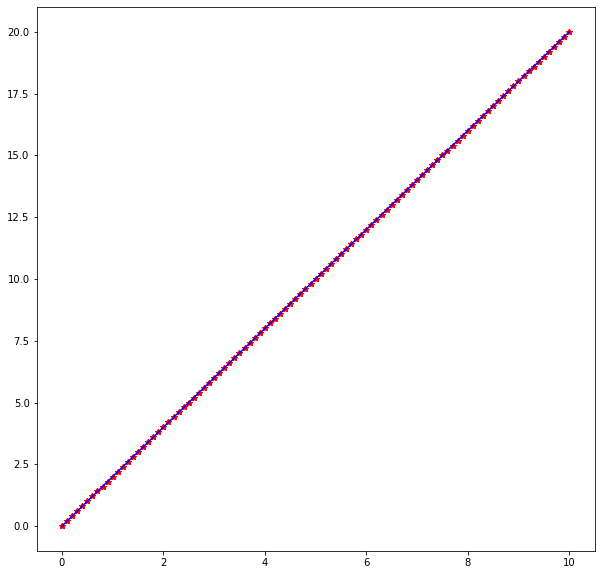

In [ ]:
p_ydata = model.predict(t_xdata)
plt.figure(figsize = (10,10))

plt.plot(t_xdata,t_ydata,'r*')
plt.plot(t_xdata,p_ydata, 'b' )
plt.show()